Домашнее задание
Возьмите датасет https://www.kaggle.com/ukveteran/mortality-and-water-hardness

В этом датасете содержатся данные по средней годовой смертности на 100000 населения и концентрации кальция в питьевой воде для 61
города в Англии и Уэльсе. Города дополнительно поделены на северные и южные.

1. Задача - ответить на вопрос - есть ли связь между жесткостью воды и средней годовой смертностью?
Построить точечный график
Рассчитать коэффициенты корреляции Пирсона и Спирмена
Построить модель линейной регрессии
Рассчитать коэффициент детерминации
Вывести график остатков

2. Сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?
Разделить данные на две группы
Повторить аналочиные шаги для каждой группы по отдельности

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('water.csv')

In [3]:
df.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


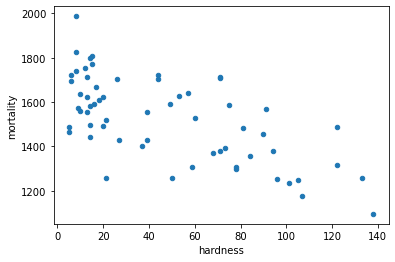

In [4]:
# Построим точечный график
df.plot(kind='scatter', x='hardness', y='mortality')

На графике видна слабая обратная взаимосвязь смертности от значения жесткости воды. 
Выдвигаем гипотезу: чем ниже жесткость воды - тем выше смертность населения.

In [5]:
# Посмотрим, есть ли и насколько сильная взаимосвязь смертности и значения жесткости воды (Пирсон)
df[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


In [6]:
#Критерий Пирсона работает только с непрерывными данными и на него значительно влияют выбросы, поэтому посчитаем К-т Спирмена
df[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


Вывод: Ориентируемся на К-т Спирмена. Связь между жесткостью воды и смертностью населения есть, но она умеренная. 

In [53]:
#Задаем независимую и зависимую переменные:
X = df[['hardness']]
y = df['mortality']

In [8]:
#Построим модель линейной регрессии:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [54]:
# Разбиваем данные на тестовые и обучающие (взяла 0.2 т.к. данных маловато)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [55]:
X_const = sm.add_constant(X_train)

In [56]:
model = sm.OLS(y_train, X_const) #Создаем пустую модель
results = model.fit() #Обучаем ее на наших обучающих данных
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.394
Method:                 Least Squares   F-statistic:                     31.60
Date:                Sun, 25 Oct 2020   Prob (F-statistic):           1.07e-06
Time:                        21:12:40   Log-Likelihood:                -308.17
No. Observations:                  48   AIC:                             620.3
Df Residuals:                      46   BIC:                             624.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1683.9213     34.526     48.773      0.0

In [57]:
# Выводим Коэффициенты уравнения регрессии и Коэффициент детерминации:
print('Коэффициенты уравнения регрессии: ', results.params)
print('Коэффициент детерминации R2: ', results.rsquared)

Коэффициенты уравнения регрессии:  const       1683.921268
hardness      -3.282818
dtype: float64
Коэффициент детерминации R2:  0.4071944339633293


Коэффициент детерминации достаточно низкий, наша модель не очень хорошая

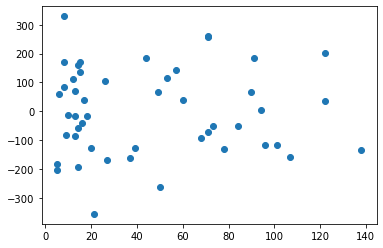

In [58]:
# Делаем анализ остатков, сначала построим график остатков (проверим на однородность дисперсии остатков модели)
plt.scatter(X_const.iloc[:, 1], results.resid)

По графику не получается найти какие-то признаки непостоянства дисперсии и тем более какие-то зависимости, остатки расположены хаотично

(array([1., 1., 6., 8., 9., 4., 8., 7., 2., 2.]),
 array([-354.98208057, -286.54974456, -218.11740855, -149.68507254,
         -81.25273652,  -12.82040051,   55.6119355 ,  124.04427151,
         192.47660752,  260.90894353,  329.34127954]),
 <a list of 10 Patch objects>)

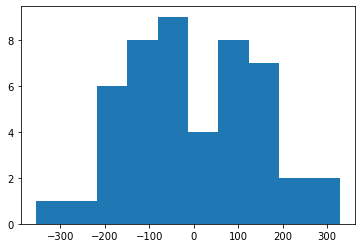

In [59]:
# Построим гистограмму распределения остатков
plt.hist(results.resid)

Из гистограммы видно, что точных попаданий мало (западение в 0), большинство точек отклонены от предсказания -> в данных есть дисперсия

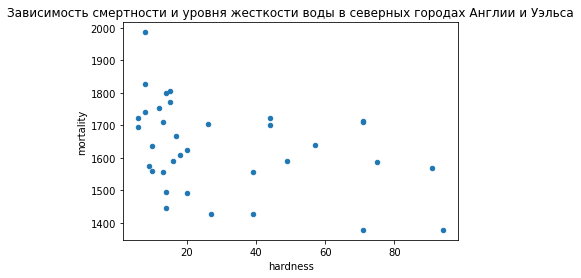

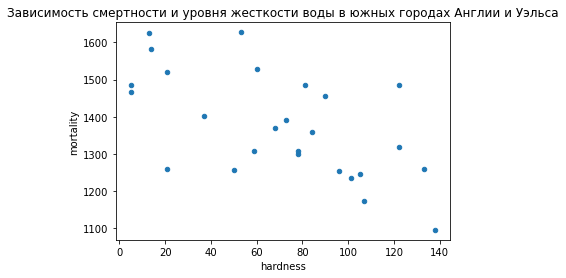

In [60]:
# Построим точечный график для северных и южных городов
df_north = df.loc[df.location == 'North']
df_south = df.loc[df.location == 'South']
df_north.plot(kind='scatter', x='hardness', y='mortality',title='Зависимость смертности и уровня жесткости воды в северных городах Англии и Уэльса')
df_south.plot(kind='scatter', x='hardness', y='mortality',title='Зависимость смертности и уровня жесткости воды в южных городах Англии и Уэльса')

Из графиков видно, что взаимосвязь смертности и уровня жесткости воды более выражена для южных регионов, для северных райнов взаимосвязь очень слабая

In [18]:
# Посмотрим, есть ли и насколько сильная взаимосвязь смертности и значения жесткости воды для северных городов (Пирсон)
df_north[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.368598
mortality,-0.368598,1.000000


In [19]:
# Посмотрим, есть ли и насколько сильная взаимосвязь смертности и значения жесткости воды для южных городов (Пирсон)
df_south[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.602153
mortality,-0.602153,1.000000


In [20]:
# Посмотрим, есть ли и насколько сильная взаимосвязь смертности и значения жесткости воды для северных городов (Спирмен)
df_north[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.404208
mortality,-0.404208,1.000000


In [21]:
# Посмотрим, есть ли и насколько сильная взаимосвязь смертности и значения жесткости воды для южных городов (Спирмен)
df_south[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.595723
mortality,-0.595723,1.000000


Вывод: Значения коэффициентов Пирсона и Спирмена для северных городов значительно ниже, чем в целом по всей выборке, и относительно таких
    же данных для южных городов. Значения коэффициентов Пирсона и Спирмена для южных городов сопоставимы по значению со значениями в целом по выборке

In [22]:
#Построим модель линейной регрессии:
#Задаем независимую и зависимую переменные:
Xn = df_north[['hardness']]
yn = df_north['mortality']
Xs = df_south[['hardness']]
ys = df_south['mortality']

In [47]:
# Разбиваем данные на тестовые и обучающие (взяла 0.2 т.к. данных маловато) для северных городов
X_train, X_test, y_train, y_test = train_test_split(Xn, yn, test_size=0.20, random_state=42)

In [48]:
X_const = sm.add_constant(X_train)

In [49]:
model_n = sm.OLS(y_train, X_const) #Создаем пустую модель для северных городов
results_n = model_n.fit() #Обучаем ее на наших обучающих данных
print(results_n.summary())

                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.187
Method:                 Least Squares   F-statistic:                     7.228
Date:                Sun, 25 Oct 2020   Prob (F-statistic):             0.0124
Time:                        20:57:03   Log-Likelihood:                -171.85
No. Observations:                  28   AIC:                             347.7
Df Residuals:                      26   BIC:                             350.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1694.9053     34.641     48.927      0.0

In [36]:
# Выводим Коэффициенты уравнения регрессии и Коэффициент детерминации для северных городов:
print('Коэффициенты уравнения регрессии: ', results_n.params)
print('Коэффициент детерминации R2: ', results_n.rsquared)

Коэффициенты уравнения регрессии:  const       1694.905301
hardness      -2.250389
dtype: float64
Коэффициент детерминации R2:  0.21753235135479743


In [37]:
# Разбиваем данные на тестовые и обучающие (взяла 0.2 т.к. данных маловато) для южных городов
X_train, X_test, y_train, y_test = train_test_split(Xs, ys, test_size=0.20, random_state=42)

In [38]:
X_const = sm.add_constant(X_train)

In [39]:
model_s = sm.OLS(y_train, X_const) #Создаем пустую модель для южных городов
results_s = model_s.fit() #Обучаем ее на наших обучающих данных
print(results_s.summary())

                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.576
Model:                            OLS   Adj. R-squared:                  0.552
Method:                 Least Squares   F-statistic:                     24.41
Date:                Sun, 25 Oct 2020   Prob (F-statistic):           0.000106
Time:                        20:16:04   Log-Likelihood:                -119.64
No. Observations:                  20   AIC:                             243.3
Df Residuals:                      18   BIC:                             245.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1595.4338     49.134     32.471      0.0

In [42]:
# Выводим Коэффициенты уравнения регрессии и Коэффициент детерминации для южных городов:
print('Коэффициенты уравнения регрессии: ', results_s.params)
print('Коэффициент детерминации R2: ', results_s.rsquared)

Коэффициенты уравнения регрессии:  const       1595.433755
hardness      -3.074661
dtype: float64
Коэффициент детерминации R2:  0.5755495589538906


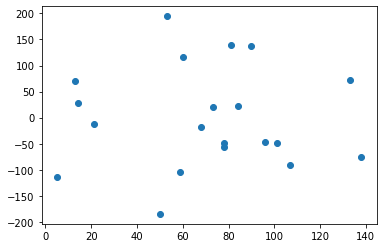

In [44]:
# Делаем анализ остатков, сначала построим график остатков для южных городов
plt.scatter(X_const.iloc[:, 1], results_s.resid)

(array([1., 1., 3., 4., 2., 3., 2., 1., 2., 1.]),
 array([-184.70069149, -146.77829311, -108.85589473,  -70.93349635,
         -33.01109797,    4.91130041,   42.83369879,   80.75609717,
         118.67849555,  156.60089393,  194.52329231]),
 <a list of 10 Patch objects>)

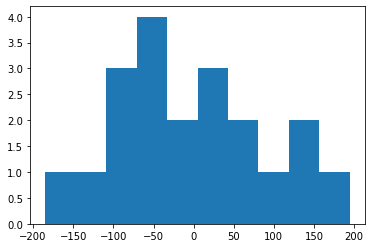

In [45]:
# Построим гистограмму распределения остатков для южных городов
plt.hist(results_s.resid)

Вывод: остатки расположены хаотично, зависимости не прослеживаются - что говорит о том, что модель подобрана правильно. 
    Гистограмма немного смещена влево, пик наблюдается на недооцененных значениях, также "западение" в 0 - точных попаданий мало.

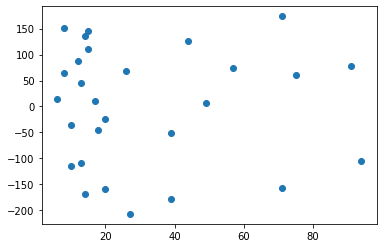

In [50]:
# Делаем анализ остатков, сначала построим график остатков для северных городов
plt.scatter(X_const.iloc[:, 1], results_n.resid)

(array([2., 3., 3., 0., 4., 3., 1., 6., 2., 4.]),
 array([-207.14480156, -169.04309047, -130.94137939,  -92.8396683 ,
         -54.73795722,  -16.63624613,   21.46546496,   59.56717604,
          97.66888713,  135.77059821,  173.8723093 ]),
 <a list of 10 Patch objects>)

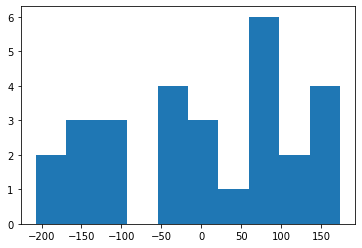

In [51]:
# Построим гистограмму распределения остатков для северных городов
plt.hist(results_n.resid)

Вывод: остатки расположены хаотично - модель подобрана неверно. Распределение остатков на гистограмме нельзя назвать нормальным. 
    Такую модель использовать нельзя. 

Общий вывод:
    На смертность влияет множество факторов, вследсвие этого высокой корреляции смертности и уровня жесткости воды не могло быть. 
    Однако, умеренная взаимосвязь для выборки в целом и для южных городов прослеживается. 
    Возможно, для северных городов есть еще какой-то значимый фактор, который нивелирует влияние пониженной жесткости воды на повышение смертности, либо есть выбросы, связанные например, с ошибками измерения жесткости воды.